# EDA

- EDA(Exploratory Data Analysis)란, 탐색적 자료 분석을 일컫는 말입니다.


- 데이터를 올바르게 이해해야 전처리를 어떻게 할지, 모델 설계를 위해 어떤 방식을 채용할지 결정할 수 있기 때문에 데이터 분석에서 중요한 단계입니다.
- 주어진 데이터의 의미를 찾기 위해 통계, 시각화 등의 기법을 사용할 수 있습니다.


- 데이터를 관찰할 때 주어진 데이터가 일변량인지, 다변량인지에 따라 접근 방향성이 달라질 수 있습니다.
- 변수가 하나라면 해당 변수의 패턴을 파악하는 것, 변수가 여러 개라면 여러 변수들 사이의 상관관계를 파악하는 것이 주 목적이라고 할 수 있습니다.

  
- 종합하자면, EDA는 크게 변수가 일변량/다변량인지, 데이터를 수치적(통계)/시각적으로 파악할지에 따라 방식을 분류할 수 있습니다.

### 예시 데이터셋

In [38]:
import seaborn as sns 
# seaborn 라이브러리는 matplotlib을 기반으로 작성된 시각화 라이브러리입니다.
# 고수준의 통계 그래프를 제공하며 pandas의 데이터프레임 구조를 사용합니다.

import pandas as pd

titanic = sns.load_dataset('titanic') # seaborn 라이브러리 패키지에서는 여러가지 데이터셋을 제공하며, 그 중 하나인 타이타닉 데이터입니다.
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 데이터 전처리

### 결측치 확인

- 데이터는 완전 무결하지 않기에, 데이터셋을 다루다보면 결측치(missing value)를 종종 확인할 수 있습니다.
- pandas 데이터프레임에서 NaN이라고 표기된 부분이 이에 해당합니다.
- 데이터프레임의 전체 정보를 알려주는 info() 함수, 혹은 결측치가 있다면 True를 반환하는 isnull() 함수 등을 통해 결측치 존재 여부를 파악할 수 있습니다
- 상황에 따라 다르지만, 일반적으로 올바른 데이터 분석을 위해서 결측치를 제거하거나 특정 값으로 대체해주는 작업이 필요합니다.

##### 결측치 제거

- 주로 결측치가 무작위로 발생했을 때 사용하는 방법입니다.
- dropna() 메서드를 통해 결측치가 포함된 레이블을 제거할 수 있습니다.

##### 결측치 대체

- 결측치가 포함된 레이블들을 제거하는 것이 분석 결과를 왜곡할 우려가 있을 경우, 결측치를 특정 값으로 대체할 수 있습니다.
- 이 때 주로 사용되는 대표치로는 평균값, 중앙값, 최빈값 등이 있습니다.
- fillna() 함수를 통해 결측치를 원하는 값으로 일괄 대체할 수 있습니다.

In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [40]:
titanic.isnull().sum() # 컬럼별 결측치 수 확인

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [44]:
titanic['age'].fillna(titanic.age.median(), inplace=True) # age열의 결측치들을 중앙값으로 치환

titanic['deck'].fillna(titanic.deck.value_counts().index[0], inplace=True) # deck열의 결측치들을 최빈값으로 치환 (categorical data이므로)

titanic['embarked'].fillna(titanic.embarked.value_counts().index[0], inplace=True)

titanic['embark_town'].fillna(titanic.embark_town.value_counts().index[0], inplace=True)

In [45]:
titanic.isnull().sum() # 결측값 채워졌는지 확인

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### 이상치 확인

- 결측치가 아예 관측되지 않은 값이라면, 이상치는 관측된 데이터의 분포에서 많이 벗어난 값을 의미합니다.
- 이상치 역시 데이터 분석에 큰 영향을 끼칠 수 있기 때문에 적절히 처리해주는 과정이 필요합니다.
- 다만 상황에 따라 이상치가 인사이트 도출의 핵심이 될 수도 있으므로 이상치를 유심히 살펴보는 것 또한 중요합니다. (ex 매크로 감지 프로그램)
- 데이터를 다룰 때 사용할 대표치를 결정할 때도 이상치의 여부는 중요한 판단 기준이 됩니다.
    - 이상치가 많다면 대표치로 평균값보다 중앙값을 사용하는 것이 더 좋은 방법일 수 있습니다.
- 이상치를 판단하는 기준으로는 크게 두 가지가 있습니다.
    - 모형이 정규분포를 따른다면 표준정규분포의 평균으로부터 3표준편차보다 멀리 떨어져 있는 값을 이상치로 판단할 수 있습니다.
    - 사분위수에 대해서는 Q1, Q3으로부터 1.5IQR 이상 떨어져 있는 값을 이상치라고 말할 수 있습니다.

### 인코딩

- 범주형 변수의 경우, 수치형 변수와 달리 기계가 텍스트의 의미를 직접적으로 이해하지 못합니다.
- 따라서 텍스트를 숫자로 바꿔주는 인코딩 작업이 필요합니다.
- 인코딩의 종류로는 범주형 변수들을 0부터 n-1의 값으로 대체하는 레이블 인코딩과, 0(false)과 1(true)로만 표현하는 원핫 인코딩이 있습니다.

### 스케일링

- 서로 다른 변수들 간 값의 범위를 일정하게 맞춰주는 작업입니다.
- scatter plot을 통해 두 변수들 간의 상관관계를 파악한다고 할 때, 표현 단위에 따라 선형관계인 것도 무작위 분포인 것처럼 보일 수 있으므로 중요합니다.
    - 예를 들어 0 근처에서 밀집되어 나타난 산점도에 대해 로그함수를 씌우면 선형관계를 따르는 경우가 있습니다. (별의 광도, 페히너의 법칙 등)
- 통계학에서는 이를 Data transformation 이라고 하며, 표준화도 이의 일종이라고 볼 수 있습니다. (standard scaling)
- 사이킷런 라이브러리에서 제공하는 StandardScaler() 등을 통해 파이썬에서도 쉽게 구현할 수 있습니다.

## 데이터 시각화

- 데이터를 시각적으로 표현하는 것은 데이터들간의 관계를 이해하는 것에 있어 매우 큰 도움이 됩니다.
- matplotlib과 seaborn 라이브러리의 도움을 받아 상황에 맞는 그래프들을 직접 그려볼 수 있습니다.
- 어떤 그래프를 그릴지는 데이터의 종류가 범주형인지 연속형인지, 일변량인지 다변량인지에 따라 큰 틀에서 나눌 수 있습니다.
- 그래프의 종류
    - 일변량(데이터 개수가 1개) 
        - 연속형
            - 히스토그램
            - 상자수염 그래프 (boxplot)
            - 커널 밀도 그래프
            - 바이올린 그래프
        
        - 범주형
            - 막대 그래프
            - 파이 그래프
            
    - 다변량(데이터 개수가 2개 이상) 
        - 연속형
            - 산점도 (scatter plot)
            - 선 그래프
        
        - 범주형

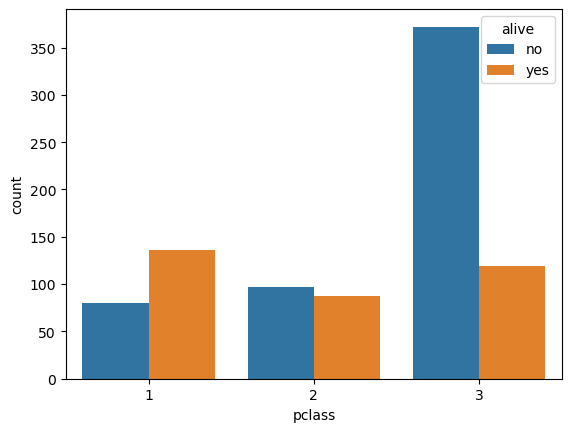

In [55]:
sns.countplot(data=titanic, x='pclass', hue='alive') # pclass 별 생존여부를 히스토그램을 통해 확인
# countplot은 범주형변수의 빈도수를 확인하는 그래프로, 연속형 변수의 히스토그램과 대응함
# hue는 지정한 속성에 따라 구분을 추가해 색상을 다르게 표시해줌
plt.show()

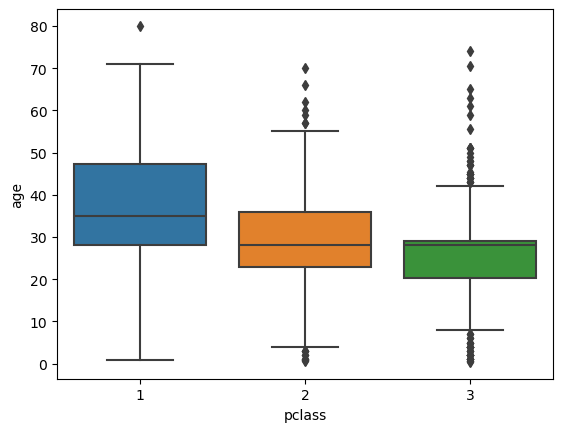

In [53]:
sns.boxplot(data=titanic, x = 'pclass', y = 'age') # pclass 별 연령대를 boxplot을 통해 확인
plt.show()

C:\Users\k\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


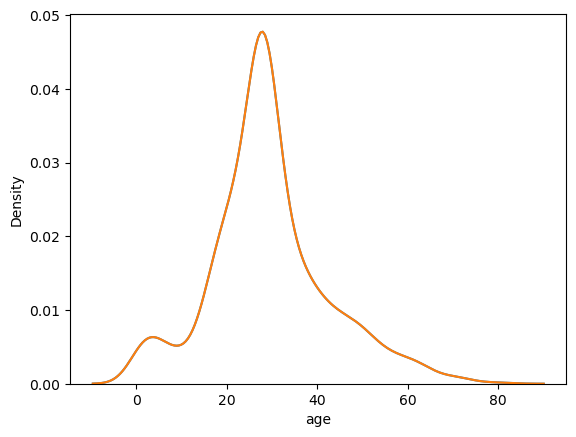

In [58]:
sns.kdeplot(titanic['age']) # 연령에 대한 히스토그램을 연속적으로 표현한 커널밀도 그래프
plt.show()

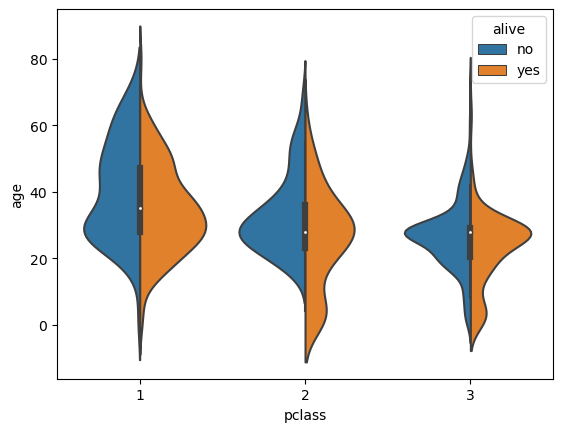

In [68]:
sns.violinplot(data=titanic, x='pclass', y='age', hue='alive', split=True) # boxplot과 커널밀도그래프를 합쳐놓은 바이올린 그래프
plt.show()

C:\Users\k\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\k\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


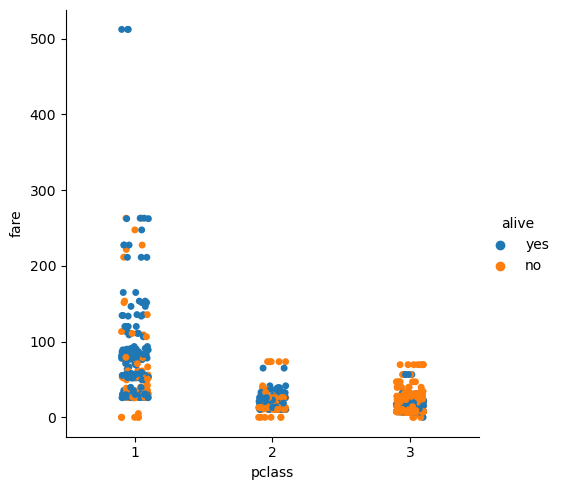

In [78]:
sns.catplot(x='pclass', y='fare', data=titanic, hue='alive') # 수치형 변수와 범주형 변수 간의 관계를 확인할 수 있는 catplot
plt.show()

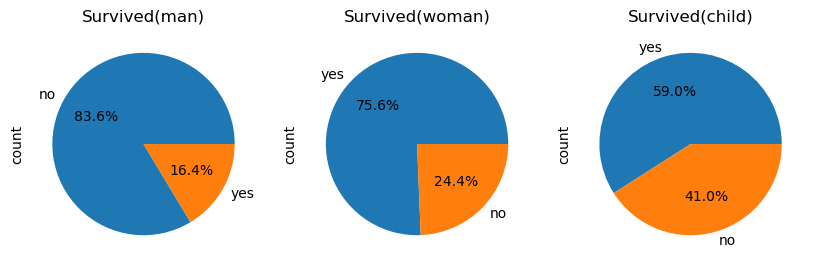

In [73]:
# 성별(man, woman, child) 별 생존률을 파이차트로 시각화

f, ax = plt.subplots(1,3, figsize=(10,5)) # 1행 3열의 subplot 생성

titanic['alive'][titanic['who']=='man'].value_counts().plot(kind='pie', autopct='%.1f%%', ax=ax[0])
titanic['alive'][titanic['who']=='woman'].value_counts().plot(kind='pie', autopct='%.1f%%', ax=ax[1])
titanic['alive'][titanic['who']=='child'].value_counts().plot(kind='pie', autopct='%.1f%%', ax=ax[2])
ax[0].set_title('Survived(man)')
ax[1].set_title('Survived(woman)')
ax[2].set_title('Survived(child)')

plt.show()

C:\Users\k\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\k\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\k\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\k\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

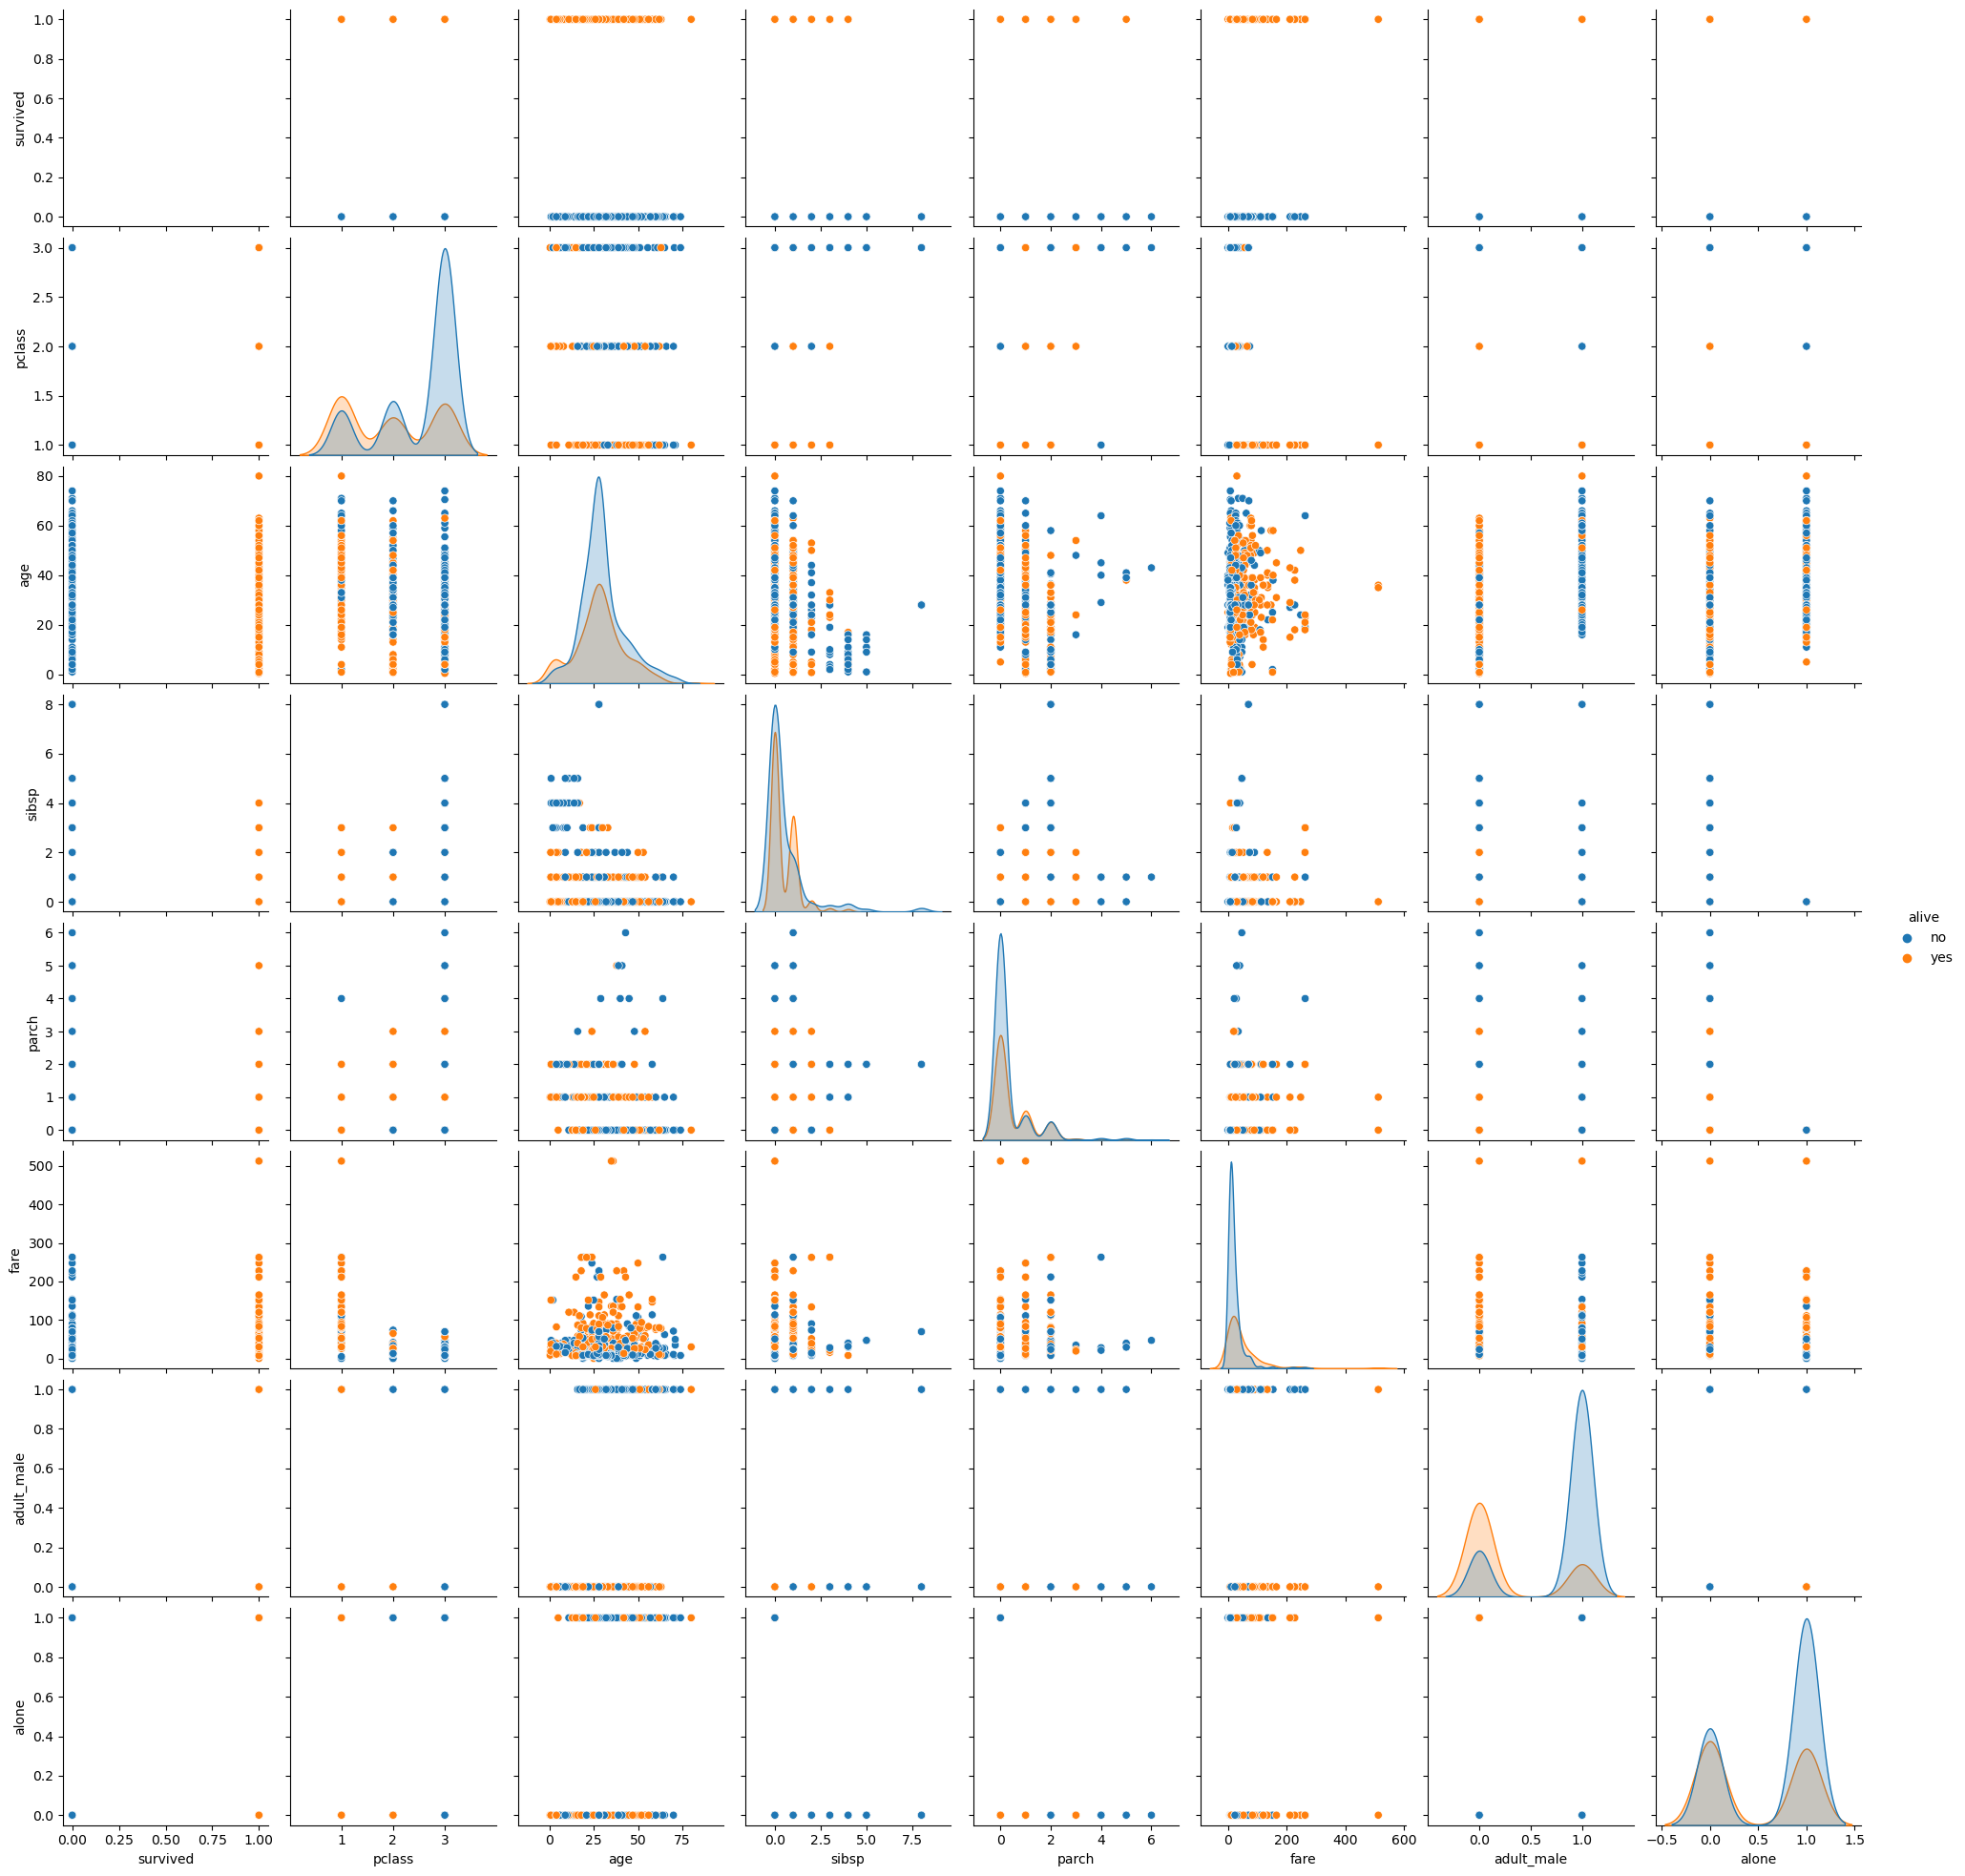

In [85]:
sns.pairplot(data=titanic, hue='alive') # 여러 변수들간의 산점도를 한눈에 보여주는 pairplot
plt.show()